In [1]:
import datasets
import pandas as pd

/Users/saiaakashramesh/Library/Caches/pypoetry/virtualenvs/hf-stellarator-NEffnWGp-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = datasets.load_dataset(
    "proxima-fusion/constellaration",
    columns=["plasma_config_id", "boundary.json"],
    split="train",
    num_proc=4,
)
pandas_ds = ds.to_pandas().set_index("plasma_config_id")

In [3]:
from constellaration.geometry.surface_rz_fourier import SurfaceRZFourier
from constellaration.mhd import vmec_utils

wout_ds = datasets.load_dataset(
    "proxima-fusion/constellaration",
    "vmecpp_wout",
    split="train",
    streaming=True,
)

row = next(wout_ds.__iter__())

vmecpp_wout_json = row["json"]
vmecpp_wout = vmec_utils.VmecppWOut.model_validate_json(vmecpp_wout_json)

# Fetch corresponding boundary

plasma_config_id = row["plasma_config_id"]
boundary_json = pandas_ds.loc[plasma_config_id]["boundary.json"]
boundary = SurfaceRZFourier.model_validate_json(boundary_json)

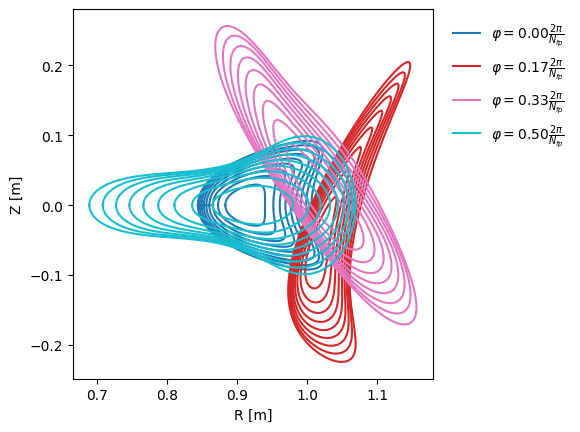

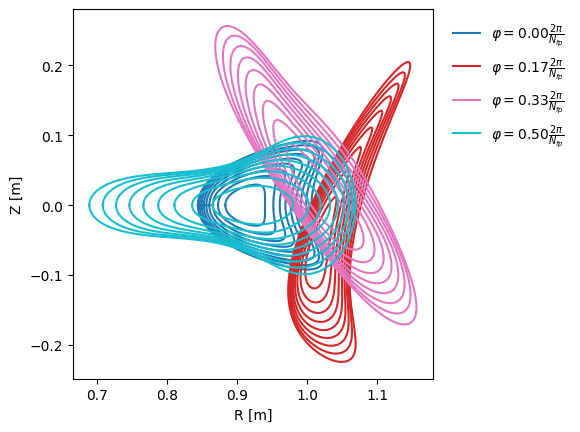

In [4]:
from constellaration.utils import visualization

visualization.plot_flux_surfaces(vmecpp_wout, boundary)